In [46]:
import pandas as pd
import geopandas as gpd

In [47]:
# Read in the data
data = pd.read_csv("../data/curated/procesed_data.csv")

data

,distance_to_CBD,time_to_CBD,distance_to_station,time_to_station,Cemeteries,Civic squares and promenades,Conservation reserves,Government schools,Natural and semi-natural open space,Non-government schools,...,Median_tot_fam_inc_weekly/inflation,Median_tot_hhd_inc_weekly/inflation,Median_tot_prsnl_inc_weekly/inflation,average_weekly_rent/inflation/household_size,A Crimes against the person/per_person,B Property and deception offences/per_person,C Drug offences/per_person,D Public order and security offences/per_person,E Justice procedures offences/per_person,F Other offences/per_person
0,9.595616,7.212516,4.753590,3.277145,0.000000,0.0,0.0,1.791759,3.555348,0.693147,...,7.908261,7.706664,6.695184,154.457569,0.000179,0.000179,0.000036,0.000024,0.000048,0.000024
1,9.106357,6.883155,7.301957,5.320568,0.693147,0.0,0.0,0.693147,0.000000,2.302585,...,7.726884,7.420758,6.856112,173.875976,0.000277,0.000351,0.000073,0.000117,0.000117,0.000000
2,10.534025,7.665097,7.165416,5.091908,0.000000,0.0,0.0,0.693147,0.000000,0.000000,...,7.174751,6.999211,6.256205,133.907353,0.001972,0.003284,0.000986,0.000658,0.001315,0.000000
3,8.787022,6.650796,7.822325,6.009796,0.000000,0.0,0.0,0.000000,1.609438,0.000000,...,7.894372,7.512192,7.038084,267.574167,0.000650,0.000910,0.000130,0.000260,0.000195,0.000000
4,10.234567,7.623837,8.514610,6.418365,0.000000,0.0,0.0,2.302585,4.553877,1.791759,...,7.632488,7.611709,6.698840,114.526777,0.000177,0.000199,0.000055,0.000066,0.000055,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,9.272611,6.995675,7.484032,5.529826,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,7.920874,7.615618,7.027431,190.136084,0.000114,0.000286,0.000029,0.000057,0.000086,0.000029
2964,9.035951,7.018939,5.797576,4.194190,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,7.844572,7.494505,6.962580,174.045808,0.000090,0.000180,0.000000,0.000030,0.000030,0.000000
2965,9.206383,6.839798,5.434595,3.010621,0.000000,0.0,0.0,0.693147,2.995732,2.079442,...,7.894420,7.668601,6.989829,165.648861,0.000169,0.000314,0.000048,0.000145,0.000073,0.000000
2966,10.237890,7.494263,6.253636,4.141546,0.000000,0.0,0.0,2.397895,2.708050,1.386294,...,7.035409,6.942072,6.041823,112.446071,0.000153,0.000200,0.000048,0.000095,0.000067,0.000019


In [48]:
target = "average_weekly_rent/inflation/household_size"

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

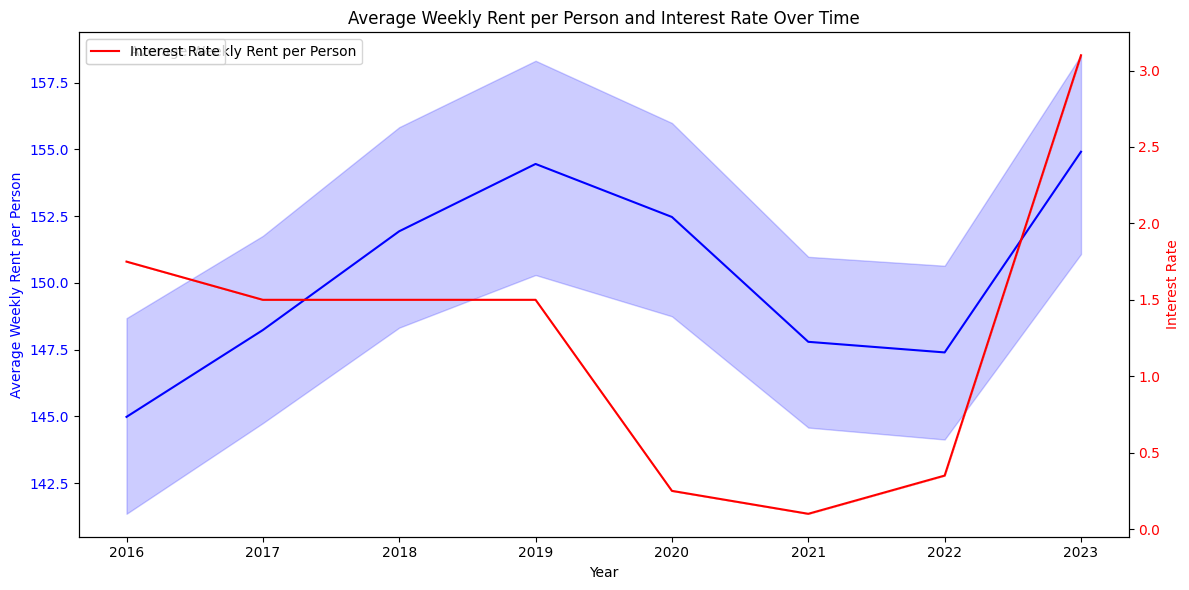

In [50]:
# plot target for each year to see if there are any trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the average weekly rent
sns.lineplot(x='year', y=target, data=data, ax=ax1, label='Average Weekly Rent per Person', color='b')
ax1.set_title('Average Weekly Rent per Person and Interest Rate Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Weekly Rent per Person', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the interest rate
ax2 = ax1.twinx()
sns.lineplot(x='year', y='interest_rate', data=data, ax=ax2, label='Interest Rate', color='r')
ax2.set_ylabel('Interest Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.show()

In [51]:
# target column
target = "average_weekly_rent/inflation/household_size"

In [52]:
# Define X and y
X = data.drop(columns=[target])
y = data[target]

In [60]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the TimeSeriesSplit with the number of splits equal to the number of years minus one
years = sorted(data['year'].unique())
n_splits = len(years) - 1
tscv = TimeSeriesSplit(n_splits=n_splits)

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['train_years', 'test_year', 'mse', 'r2', 'predictions'])

# Iterate through the splits
for train_index, test_index in tscv.split(data):
    train_years = data.iloc[train_index]['year'].unique()
    test_year = data.iloc[test_index]['year'].unique()[0]
    
    # Split the data into training and testing sets
    X_train, X_test = data.iloc[train_index].drop(columns=[target, 'year']), data.iloc[test_index].drop(columns=[target, 'year'])
    y_train, y_test = data.iloc[train_index][target], data.iloc[test_index][target]
    
    # Initialize and train the model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2, 'predictions': y_pred}, ignore_index=True)

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_97303/642920439.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2, 'predictions': y_pred}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_97303/642920439.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2, 'predictions': y_pred}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_97303/642920439.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_yea

                                  train_years test_year         mse        r2  \
0                                      [2016]      2017   53.959440  0.956910   
1                                [2016, 2017]      2018   39.785542  0.970373   
2                          [2016, 2017, 2018]      2019   40.010832  0.972587   
3                    [2016, 2017, 2018, 2019]      2020   31.380313  0.977110   
4              [2016, 2017, 2018, 2019, 2020]      2021  180.656276  0.810382   
5        [2016, 2017, 2018, 2019, 2020, 2021]      2022  103.866146  0.893533   
6  [2016, 2017, 2018, 2019, 2020, 2021, 2022]      2023   92.936103  0.931260   

                                         predictions  
0  [108.59759925748378, 152.37162357848874, 153.3...  
1  [161.32648334476326, 170.49485418590072, 128.0...  
2  [141.2568694134564, 143.9371783767309, 124.684...  
3  [215.28915783652533, 167.87790264038398, 153.5...  
4  [180.42862558522936, 213.53946167469073, 183.0...  
5  [161.9630701625738

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_97303/642920439.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2, 'predictions': y_pred}, ignore_index=True)


In [66]:
from xgboost import XGBRegressor

# Initialize the TimeSeriesSplit with the number of splits equal to the number of years minus one
years = sorted(data['year'].unique())
n_splits = len(years) - 1
tscv = TimeSeriesSplit(n_splits=n_splits)

# Prepare a DataFrame to store the results
xg_results = pd.DataFrame(columns=['train_years', 'test_year', 'mse', 'r2', 'predictions'])

# Iterate through the splits
for train_index, test_index in tscv.split(data):
    train_years = data.iloc[train_index]['year'].unique()
    test_year = data.iloc[test_index]['year'].unique()[0]
    
    # Split the data into training and testing sets
    X_train, X_test = data.iloc[train_index].drop(columns=[target, 'year']), data.iloc[test_index].drop(columns=[target, 'year'])
    y_train, y_test = data.iloc[train_index][target], data.iloc[test_index][target]
    
    # Initialize and train the model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    xg_results = xg_results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2, 'predictions': y_pred}, ignore_index=True)


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_97303/2167095976.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xg_results = xg_results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2, 'predictions': y_pred}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_97303/2167095976.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xg_results = xg_results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2, 'predictions': y_pred}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_97303/2167095976.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xg_results = xg_results.append({'train_years': t

In [71]:
# Initialize the TimeSeriesSplit with the number of splits equal to the number of years minus one
years = sorted(data['year'].unique())
n_splits = len(years) - 1
tscv = TimeSeriesSplit(n_splits=n_splits)

# Prepare a DataFrame to store the results
lr_results = pd.DataFrame(columns=['train_years', 'test_year', 'mse', 'r2', 'predictions'])

# Iterate through the splits
for train_index, test_index in tscv.split(data):
    train_years = data.iloc[train_index]['year'].unique()
    test_year = data.iloc[test_index]['year'].unique()[0]
    
    # Split the data into training and testing sets
    X_train, X_test = data.iloc[train_index].drop(columns=[target, 'year']), data.iloc[test_index].drop(columns=[target, 'year'])
    y_train, y_test = data.iloc[train_index][target], data.iloc[test_index][target]
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    lr_results = lr_results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2, 'predictions': y_pred}, ignore_index=True)

# get mean_predictions
lr_results['mean_predictions'] = results['predictions'].apply(lambda x: np.mean(x))

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_97303/1495374977.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lr_results = lr_results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2, 'predictions': y_pred}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_97303/1495374977.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lr_results = lr_results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2, 'predictions': y_pred}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_97303/1495374977.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lr_results = lr_results.append({'train_years': t

In [62]:

# Display the results
results.head()

,train_years,test_year,mse,r2,predictions
0,[2016],2017,53.959440,0.956910,"[108.59759925748378, 152.37162357848874, 153.3..."
1,"[2016, 2017]",2018,39.785542,0.970373,"[161.32648334476326, 170.49485418590072, 128.0..."
2,"[2016, 2017, 2018]",2019,40.010832,0.972587,"[141.2568694134564, 143.9371783767309, 124.684..."
3,"[2016, 2017, 2018, 2019]",2020,31.380313,0.977110,"[215.28915783652533, 167.87790264038398, 153.5..."
4,"[2016, 2017, 2018, 2019, 2020]",2021,180.656276,0.810382,"[180.42862558522936, 213.53946167469073, 183.0..."


In [67]:
# get XG results

,train_years,test_year,mse,r2,predictions
0,[2016],2017,44.715627,0.964292,"[110.596985, 152.85313, 143.02573, 240.03903, ..."
1,"[2016, 2017]",2018,32.273525,0.975967,"[159.68207, 171.7749, 125.441895, 152.62064, 1..."
2,"[2016, 2017, 2018]",2019,27.697367,0.981024,"[140.80907, 143.70938, 124.65507, 128.61777, 1..."
3,"[2016, 2017, 2018, 2019]",2020,31.951314,0.976693,"[215.80453, 177.04893, 151.04329, 151.57396, 1..."
4,"[2016, 2017, 2018, 2019, 2020]",2021,169.368681,0.822230,"[189.62206, 209.04704, 179.7496, 126.60385, 13..."


In [64]:
# get preditions for every year

# aggregate by year find the mean
data_agg = data[['year','average_weekly_rent/inflation/household_size']].groupby('year').mean().reset_index()

results["mean_predictions"] = results["predictions"].apply(lambda x: np.mean(x))
results["mean_predictions"] = results["mean_predictions"].apply(lambda x: np.mean(x))



results

,train_years,test_year,mse,r2,predictions,mean_predictions
0,[2016],2017,53.959440,0.956910,"[108.59759925748378, 152.37162357848874, 153.3...",146.366028
1,"[2016, 2017]",2018,39.785542,0.970373,"[161.32648334476326, 170.49485418590072, 128.0...",149.453123
2,"[2016, 2017, 2018]",2019,40.010832,0.972587,"[141.2568694134564, 143.9371783767309, 124.684...",152.497558
3,"[2016, 2017, 2018, 2019]",2020,31.380313,0.977110,"[215.28915783652533, 167.87790264038398, 153.5...",154.783620
4,"[2016, 2017, 2018, 2019, 2020]",2021,180.656276,0.810382,"[180.42862558522936, 213.53946167469073, 183.0...",155.150337
5,"[2016, 2017, 2018, 2019, 2020, 2021]",2022,103.866146,0.893533,"[161.96307016257387, 100.95954132658235, 193.5...",152.851217
6,"[2016, 2017, 2018, 2019, 2020, 2021, 2022]",2023,92.936103,0.931260,"[171.59168648117003, 118.74011976108994, 157.8...",151.112097


In [72]:
results['mean_XG_predictions'] = xg_results['predictions'].apply(lambda x: np.mean(x))
results['mean_LR_predictions'] = lr_results['predictions'].apply(lambda x: np.mean(x))
results["actual"] = data_agg["average_weekly_rent/inflation/household_size"]

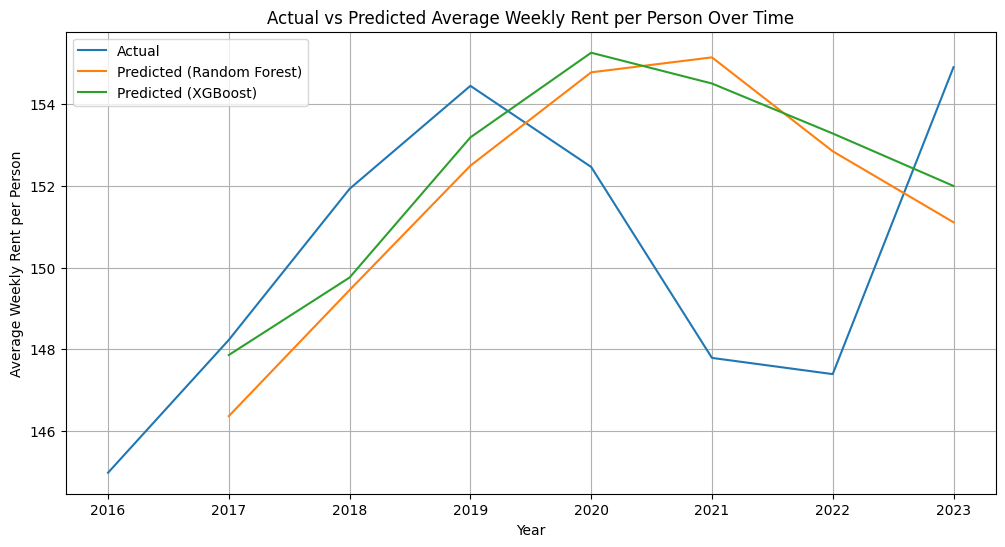

In [75]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='year', y='average_weekly_rent/inflation/household_size', data=data_agg, ax=ax, label='Actual')
sns.lineplot(x='test_year', y='mean_predictions', data=results, ax=ax, label='Predicted (Random Forest)')
sns.lineplot(x='test_year', y='mean_XG_predictions', data=results, ax=ax, label='Predicted (XGBoost)')
ax.set_title('Actual vs Predicted Average Weekly Rent per Person Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Average Weekly Rent per Person')
ax.legend()
ax.grid(True)
plt.show()


In [34]:
# look at coeffs
X.columns

# get 

Index(['distance_to_CBD', 'time_to_CBD', 'distance_to_station',
       'time_to_station', 'Cemeteries', 'Civic squares and promenades',
       'Conservation reserves', 'Government schools',
       'Natural and semi-natural open space', 'Non-government schools',
       'Parks and gardens', 'Public housing reserves', 'Recreation corridor',
       'Services and utilities reserves',
       'Sportsfields and organised recreation', 'Tertiary institutions',
       'Transport reservations', 'year', 'Average_household_size',
       'Average_num_psns_per_bedroom', 'Median_age_persons', 'Tot_P_P',
       'Total_dwelings', 'average_quarterly_count', 'commercial', 'education',
       'food_establishments', 'healthcare', 'industrial', 'public_transport',
       'recreation', 'residential', 'shopping', 'SAL_CODE', 'median_score',
       'average_price', 'proximity_to_beach',
       'Median_tot_fam_inc_weekly/inflation',
       'Median_tot_hhd_inc_weekly/inflation',
       'Median_tot_prsnl_inc_weekly

In [78]:
from sklearn.feature_selection import SelectKBest, f_regression

# take 10 most important features for lin reg and find R^2
# BEGIN: 

X, y = data.drop(columns=[target, 'year']), data[target]

# Select the 10 most important features
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Fit the Linear Regression model with the selected features
model = LinearRegression()
model.fit(X_new, y)

# Predict and calculate R^2
y_pred = model.predict(selector.transform(X_test))
r2 = r2_score(y_test, y_pred)

selected_features, r2
# END:


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- year
